In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
df = pd.read_csv('/kaggle/input/aapl-data/AAPL.csv')

In [7]:
df.head

<bound method NDFrame.head of       Unnamed: 0 symbol                       date    close     high  \
0              0   AAPL  2015-05-27 00:00:00+00:00  132.045  132.260   
1              1   AAPL  2015-05-28 00:00:00+00:00  131.780  131.950   
2              2   AAPL  2015-05-29 00:00:00+00:00  130.280  131.450   
3              3   AAPL  2015-06-01 00:00:00+00:00  130.535  131.390   
4              4   AAPL  2015-06-02 00:00:00+00:00  129.960  130.655   
...          ...    ...                        ...      ...      ...   
1253        1253   AAPL  2020-05-18 00:00:00+00:00  314.960  316.500   
1254        1254   AAPL  2020-05-19 00:00:00+00:00  313.140  318.520   
1255        1255   AAPL  2020-05-20 00:00:00+00:00  319.230  319.520   
1256        1256   AAPL  2020-05-21 00:00:00+00:00  316.850  320.890   
1257        1257   AAPL  2020-05-22 00:00:00+00:00  318.890  319.230   

           low    open    volume    adjClose     adjHigh      adjLow  \
0     130.0500  130.34  45833246 

In [14]:
df1 = df.reset_index()['high']

In [15]:
df1.head

<bound method NDFrame.head of 0       132.260
1       131.950
2       131.450
3       131.390
4       130.655
         ...   
1253    316.500
1254    318.520
1255    319.520
1256    320.890
1257    319.230
Name: high, Length: 1258, dtype: float64>

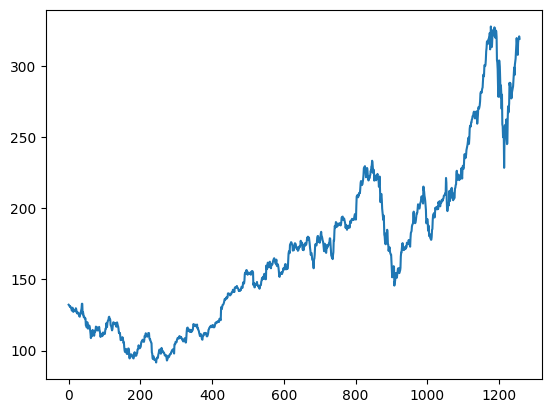

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.17186045]
 [0.17054789]
 [0.16843086]
 ...
 [0.96473029]
 [0.97053095]
 [0.96350241]]


In [18]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(817, 441)

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2024-03-27 10:43:06.744784: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 10:43:06.744892: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 10:43:06.915708: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0331 - val_loss: 0.0739
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0017 - val_loss: 0.0038
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.7152e-04 - val_loss: 0.0046
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.4281e-04 - val_loss: 0.0064
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8162e-04 - val_loss: 0.0053
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.2327e-04 - val_loss: 0.0053
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8036e-04 - val_loss: 0.0038
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.1336e-04 - val_loss: 0.0046
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.5762e-04 - val_loss: 0.0047
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.5004e-04 - val_loss: 0.0038
Epoch 12/100
12/12 ━

In [27]:
import tensorflow as tf

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

143.0491313835479

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

240.05618544298557

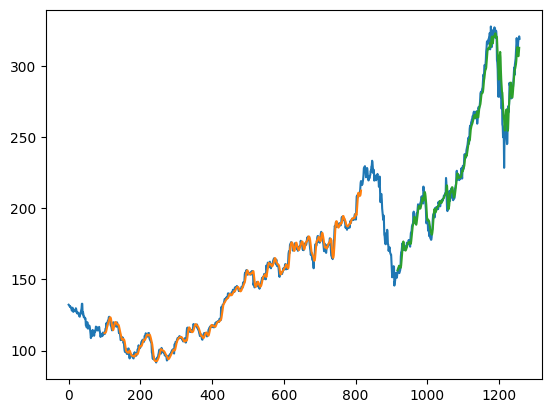

In [32]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
x_input=test_data[341:].reshape(1,-1)


temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9543063]
101
1 day input [0.8846219  0.88453722 0.8819121  0.88589212 0.90088026 0.9262427
 0.93572699 0.95435685 0.95647388 0.94770937 0.94855619 0.96142772
 0.96261326 0.9667203  0.96489965 0.98086205 0.93191633 0.95998814
 1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.9

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

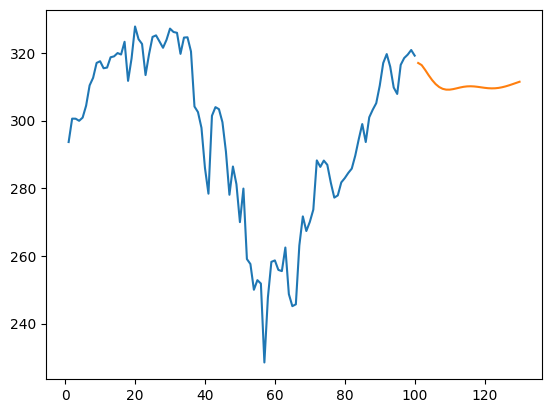

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

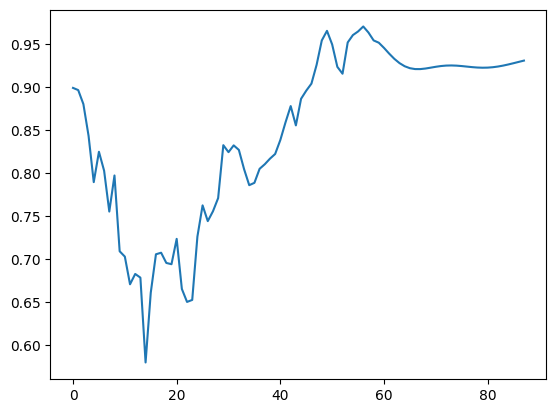

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])


In [40]:
df3=scaler.inverse_transform(df3).tolist()

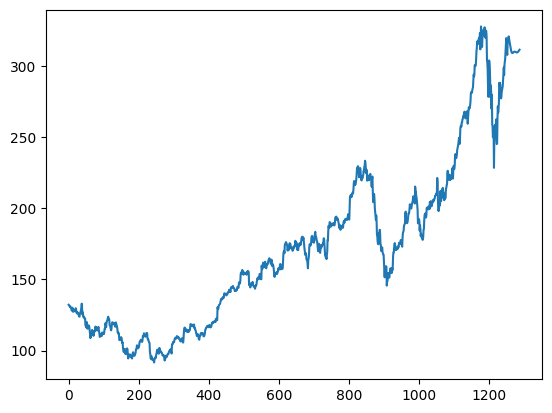

In [41]:
plt.plot(df3)